## Comparação: BoW vs TF-IDF vs Word Embedding

Vamos comparar as três abordagens principais de representação vetorial de texto com exemplos simples:

- **Bag of Words (BoW)**: representa o texto como contagem de palavras.
- **TF-IDF**: ajusta as contagens dando menos peso a palavras frequentes.
- **Word Embedding**: representa palavras como vetores densos com semântica.

### Exercício - Comparação com Frases Simples

Considere as frases abaixo:

- `frase_1 = "o cachorro gosta de osso"`
- `frase_2 = "o gato gosta de peixe"`
- `frase_3 = "peixe e osso são alimentos"`

Vamos comparar a similaridade entre elas usando BoW, TF-IDF e Embeddings.

### Visualização - Similaridade com Mapas de Calor

Vamos visualizar as similaridades calculadas entre frases usando **BoW**, **TF-IDF** e **Word Embeddings** com mapas de calor.

In [ ]:
#!pip install seaborn as sns

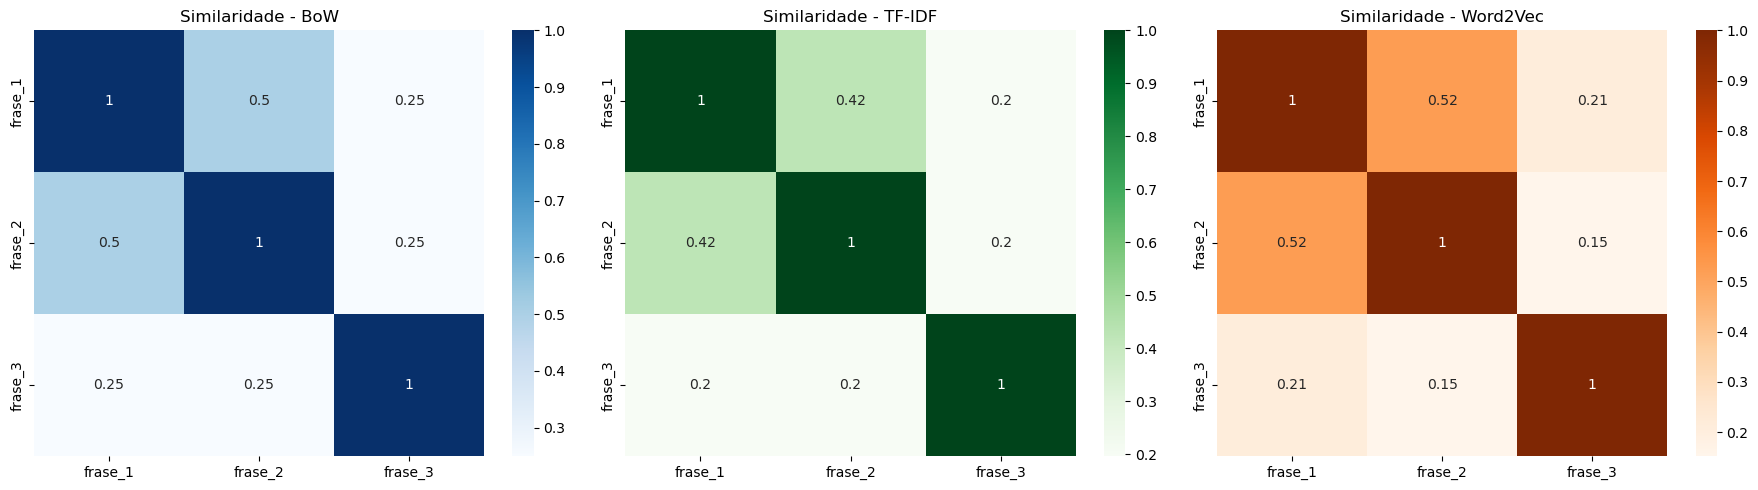

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["frase_1", "frase_2", "frase_3"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# BoW
sns.heatmap(sim_bow, xticklabels=labels, yticklabels=labels, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_title("Similaridade - BoW")

# TF-IDF
sns.heatmap(sim_tfidf, xticklabels=labels, yticklabels=labels, annot=True, cmap="Greens", ax=axes[1])
axes[1].set_title("Similaridade - TF-IDF")

# Embedding
sns.heatmap(sim_embed, xticklabels=labels, yticklabels=labels, annot=True, cmap="Oranges", ax=axes[2])
axes[2].set_title("Similaridade - Word2Vec")

plt.tight_layout()
plt.show()

# Word Embeddings

Até agora, trabalhamos com representações vetoriais simples como:

- **Bag of Words (BoW)**: conta a frequência das palavras, ignorando ordem e contexto.
- **TF-IDF**: ajusta a frequência com base na raridade da palavra no corpus.

Esses métodos são úteis, mas têm **limitações importantes**:
- Eles geram vetores esparsos (muitos zeros).
- Não capturam **semântica** ou **relações de significado**.
- Não entendem contexto nem sinônimos.

## O que são Word Embeddings?

**Word Embeddings** são representações densas e contínuas de palavras em vetores de números reais.

Eles são treinados com o objetivo de colocar palavras que **aparecem em contextos semelhantes** próximas no espaço vetorial.

Por exemplo:
- `rei - homem + mulher ≈ rainha`
- `roma - itália + frança ≈ paris`

Essas relações são **aprendidas automaticamente** a partir de textos, e são fundamentais para tarefas modernas de NLP.

## Como funcionam na prática?

Durante o treinamento, cada palavra é associada a um vetor. O modelo aprende a ajustar esses vetores de forma que:

- Palavras próximas em **significado** fiquem próximas em **distância vetorial**.
- Palavras com **papéis gramaticais ou semânticos similares** formem agrupamentos.

Essa estrutura vetorial permite:
- Calcular **semelhança entre palavras** com cosseno.
- Realizar **analogias** (como "rei - homem + mulher = rainha").
- Agrupar palavras semanticamente relacionadas (ex: frutas, países, profissões).

No próximo passo, vamos comparar essas abordagens com exemplos simples.

### Exemplo de Vizinhança Semântica

Imagine que temos vetores de palavras e queremos encontrar os termos mais próximos de "rei":

- `most_similar("rei")` retorna: `"rainha"`, `"príncipe"`, `"monarca"`, `"imperador"`

A ideia é que, ao treinar embeddings, aprendemos que essas palavras **compartilham contexto** e **significado próximo**.

No próximo passo, usaremos o Word2Vec para treinar esses embeddings.

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Exemplo com palavras relacionadas semanticamente
corpus = [
    "rei rainha homem mulher príncipe princesa monarca trono reino imperador imperatriz".split()
]

# Treinar modelo Word2Vec
model_demo = Word2Vec(sentences=corpus, vector_size=20, window=2, min_count=1, sg=1)

# Ver similaridade entre algumas palavras
print("Palavras mais próximas de 'rei':")
print(model_demo.wv.most_similar("rei"))

# Mostrar vetor do embedding da palavra 'rei'
print("\nVetor de embedding para 'rei':")
print(model_demo.wv["rei"])

Palavras mais próximas de 'rei':
[('trono', 0.26128506660461426), ('imperador', 0.25416168570518494), ('reino', 0.2058275043964386), ('homem', 0.14296843111515045), ('princesa', 0.1220124289393425), ('mulher', 0.08718648552894592), ('príncipe', 0.05123509466648102), ('rainha', -0.09518136084079742), ('imperatriz', -0.13715648651123047), ('monarca', -0.19900377094745636)]

Vetor de embedding para 'rei':
[ 0.00047282  0.0153866  -0.03406323 -0.00687733  0.0383429   0.03673205
 -0.01836649  0.01321351 -0.04158565  0.03102743 -0.02318661 -0.01582053
  0.04655678  0.00436693  0.03745351 -0.03037031  0.02580253  0.04961411
 -0.04228695 -0.02567846]


In [ ]:
#!pip install gensim umap umap-learn

d:\SETUPS\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\SETUPS\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


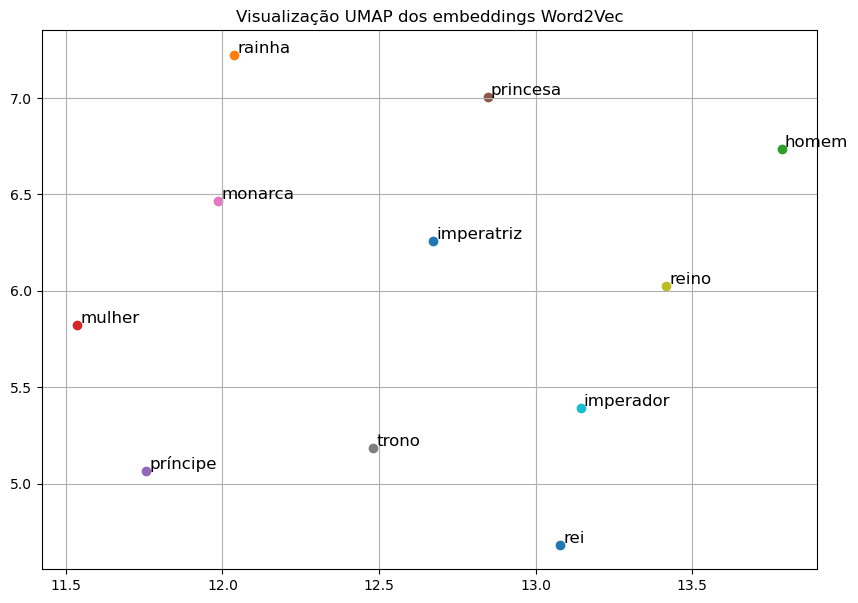

In [18]:
from gensim.models import Word2Vec
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Corpus e modelo
corpus = [
    "rei rainha homem mulher príncipe princesa monarca trono reino imperador imperatriz".split()
]
model_demo = Word2Vec(sentences=corpus, vector_size=20, window=2, min_count=1, sg=1)

# Lista de palavras
words = "rei rainha homem mulher príncipe princesa monarca trono reino imperador imperatriz".split()

# Verificar palavras no vocabulário
words_in_vocab = [word for word in words if word in model_demo.wv]
if not words_in_vocab:
    raise ValueError("Nenhuma das palavras fornecidas está no vocabulário do modelo.")

# Obter vetores
X = np.array([model_demo.wv[word] for word in words_in_vocab])

# Redução com UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# Visualização
plt.figure(figsize=(10, 7))
for i, word in enumerate(words_in_vocab):
    plt.scatter(*X_umap[i])
    plt.text(X_umap[i, 0] + 0.01, X_umap[i, 1] + 0.01, word, fontsize=12)
plt.title("Visualização UMAP dos embeddings Word2Vec")
plt.grid(True)
plt.show()


### Explorando Word Embeddings Pré-Treinados

Podemos carregar embeddings prontos como GloVe, FastText ou Word2Vec e explorar sua semântica.  
(Neste notebook usaremos modelos treinados localmente, mas vale explorar esses pré-treinados em projetos reais).

# Processamento de Linguagem Natural (NLP)
## Word2Vec, Representações Semânticas e Similaridade

Neste notebook, você aprenderá a usar **Word2Vec**, uma técnica poderosa de representação vetorial de palavras baseada em aprendizado de máquina.
Exploraremos exemplos simples, aplicaremos em grandes corpora, e finalizaremos com um exercício integrador de pré-processamento, vetorização e similaridade.

## 1. Introdução ao Word2Vec
O Word2Vec é um algoritmo criado pelo Google que transforma palavras em vetores densos de forma que palavras semanticamente semelhantes estejam próximas no espaço vetorial.

Existem dois modelos principais:
- **CBOW (Continuous Bag of Words)**: prediz a palavra com base no contexto.
- **Skip-Gram**: prediz o contexto com base em uma palavra.

Vamos treinar um modelo simples e explorar seus usos.

## O que é Word2Vec?
O **Word2Vec** é uma técnica de modelagem de linguagem baseada em redes neurais criada pelo Google. Ele transforma palavras em vetores densos (de números reais), onde palavras com significados semelhantes possuem representações vetoriais próximas entre si.

Ao contrário das abordagens BoW e TF-IDF, que são baseadas apenas em frequência de palavras, o Word2Vec captura **relações semânticas** entre palavras.

## Arquiteturas Word2Vec
O Word2Vec pode ser treinado de duas maneiras:

### 1. CBOW (Continuous Bag of Words)
- O modelo tenta prever a palavra central (*target*) com base em seu **contexto**.
- Exemplo:
    - Frase: "o cachorro gosta de osso"
    - Contexto de "gosta": \["o", "cachorro", "de", "osso"\]
    - CBOW aprende a prever "gosta" dado esse contexto.
- É eficiente e funciona bem com dados menores.

### 2. Skip-Gram
- O modelo tenta prever as palavras de **contexto** a partir de uma palavra central.
- Exemplo:
    - Palavra central: "gosta"
    - Objetivo: prever "cachorro", "de", "osso"
- Funciona melhor com grandes quantidades de dados e captura relações mais raras.

Ambos os modelos usam uma rede neural rasa para aprender os vetores de palavra, e os vetores aprendidos podem ser utilizados em tarefas como:
- Medir similaridade semântica
- Agrupar palavras por significado
- Inicialização de embeddings em redes neurais maiores

### Exemplo CBOW (Continuous Bag of Words)

Vamos usar uma frase simples:

> **Frase:** "O cachorro comeu a carne gostosa"

Se quisermos prever a palavra central "carne", usando uma janela de contexto de tamanho 2 (duas palavras à esquerda e duas à direita), o modelo CBOW funciona assim:

- **Contexto:** ["comeu", "a", "gostosa"]
- **Target (prever):** "carne"

**Representação:**
```
Input: ["comeu", "a", "gostosa"]
→ Word2Vec (CBOW) →
Output: "carne"
```

O modelo aprende a representar a palavra "carne" como uma média das representações de contexto.

### Exemplo Skip-Gram

Com a mesma frase:

> **Frase:** "O cachorro comeu a carne saborosa"

Se o modelo usar "carne" como palavra central, ele tentará prever suas palavras de contexto com uma janela de tamanho 2:

- **Input (palavra central):** "carne"
- **Outputs (contexto):** ["a", "saborosa"]

**Representação:**
```
Input: "carne"
→ Word2Vec (Skip-Gram) →
Output: ["a", "saborosa"]
```

Neste modelo, a palavra central é usada para prever o contexto.

### Exercício 1 - Treinando Word2Vec
Utilize o Gensim para treinar um modelo Word2Vec com as frases abaixo:

In [ ]:
from gensim.models import Word2Vec

corpus = [
    "o gato gosta de peixe",
    "o cachorro gosta de osso",
    "peixe e osso são alimentos",
    "gato e cachorro são animais",
]

# Pré-processamento

# Treinar modelo Word2Vec

# Ver palavras semelhantes


## 2. Explorando Similaridade de Palavras
Agora que o modelo está treinado, podemos explorar:
- Palavras mais similares
- Distância vetorial
- Visualização do espaço semântico.

### Exercício 2 - Similaridade e Analogias com Word2Vec
Teste diferentes combinações de similaridade e analogia com seu modelo:

In [ ]:
print("Palavras similares a 'peixe':")
print(model.wv.most_similar("peixe"))

# teste outras possibilidades

Palavras similares a 'peixe':
[('osso', 0.16563551127910614), ('gato', 0.1365695744752884), ('e', 0.12486687302589417), ('o', 0.10704139620065689), ('de', 0.10232099145650864), ('gosta', -0.056214287877082825), ('animais', -0.06343827396631241), ('alimentos', -0.09344357997179031), ('são', -0.11820437759160995), ('cachorro', -0.20600514113903046)]

Similaridade entre 'gato' e 'cachorro':
0.04511034


## 3. Word2Vec com Dataset Grande
Vamos aplicar o Word2Vec em um corpus maior.

Para isso, usaremos o `datasets` da HuggingFace.

Você pode substituir por outro corpus maior se quiser (Wikipedia, textos literários, etc.)


Usaremos o dataset `text` do `AG News` como exemplo. Você pode substituir por outro corpus maior se quiser (Wikipedia, textos literários, etc.).

In [ ]:
#!pip install datasets

In [7]:
from datasets import load_dataset
from gensim.models import Word2Vec
from tqdm import tqdm

# Carregar dataset AG News
dataset = load_dataset("ag_news", split="train[:20000]")  # reduzido por performance
texts = [sample["text"].lower().split() for sample in dataset]

# Treinar modelo Word2Vec
model_large = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=5, workers=4)

print("Modelo treinado com vocabulário de tamanho:", len(model_large.wv))

Modelo treinado com vocabulário de tamanho: 13499


### Exercícios com Analogias

Vamos testar se o modelo aprendeu algumas relações clássicas de analogia semântica:

Exemplo:

- positive=["king", "woman"], negative=["man"] -> model_large.wv.most_similar(positive=["king", "woman"], negative=["man"])

In [ ]:
try:
    # logica aqui
except KeyError as e:
    print("Palavra fora do vocabulário:", e)

rei - homem + mulher ≈ [('managing', 0.9666675329208374), ('boosts', 0.9665273427963257), ('3,', 0.9657607674598694), ('snaps', 0.9654290080070496), ('ratings', 0.9642461538314819), ('downs', 0.9622467160224915), ('trademark', 0.9618633985519409), ('clearance', 0.9613924622535706), ('forest', 0.9611964821815491), ('keyword', 0.9610552191734314)]
paris - frança + alemanha ≈ [('belgium', 0.9012719392776489), ('switzerland', 0.8940240740776062), ('clinches', 0.8916482925415039), ('despatie', 0.8852865695953369), ('mizuki', 0.8772168159484863), ('winners', 0.8770570755004883), ('atlanta', 0.8767784833908081), ('retires', 0.8760075569152832), ('tsoumeleka', 0.8756251335144043), ('el', 0.8747906684875488)]
roma - itália + frança ≈ [('abuja,', 0.9089134931564331), ('abuja', 0.9004111886024475), ('nigeria', 0.8924781084060669), ("sudan's", 0.8845967650413513), ('paris', 0.8842765688896179), ('disarming', 0.8825387358665466), ('cairo', 0.8742401599884033), ('jerusalem', 0.8656312227249146), ('s

## 4. Desafio Final - Integração Completa
Neste exercício final, você irá:
- Pré-processar textos (remoção de pontuação, stopwords, lemmatization/stemming, etc)
- Criar vetores com BoW, TF-IDF e Word Embedding
- Calcular similaridade entre frases usando BoW.
- Calcular similaridade entre frases usando TF-IDF.
- Calcular similaridade usando Word2Vec.

In [ ]:
from datasets import load_dataset
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Carregar dataset com 100.000 amostras
dataset = load_dataset("ag_news", split="train[:100000]")
frases = [sample["text"].lower().split() for sample in dataset]

# Treinar modelo Word2Vec


# Escolher frases de exemplo


### Exercício Extra - Analogias Semânticas

Com o modelo treinado em corpus grande, tente responder perguntas do tipo:

- **"rei" - "homem" + "mulher" ≈ ?**
- **"paris" - "frança" + "alemanha" ≈ ?**

Use o método `model.wv.most_similar(positive=["paris", "alemanha"], negative=["frança"])`.

In [ ]:
# Exemplo com analogias semânticas
try:
    print(model_large.wv.most_similar(positive=["paris", "germany"], negative=["france"]))
except KeyError as e:
    print("Palavra fora do vocabulário:", e)

In [ ]:
# teste com novos exemplos

### Extra - Visualização com UMAP

Visualize os vetores de palavras em 2D com UMAP.

In [ ]:
# pip install umap-learn se necessário
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Lista de palavras
words = ["gato", "cachorro", "peixe", "osso", "alimento", "animal"]
words_in_vocab = [word for word in words if word in model.wv]

if not words_in_vocab:
    raise ValueError("Nenhuma das palavras fornecidas está no vocabulário do modelo.")

X = np.array([model.wv[word] for word in words_in_vocab], dtype=np.float64)

# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# Visualização
plt.figure(figsize=(8, 6))
for i, word in enumerate(words_in_vocab):
    plt.scatter(*X_umap[i])
    plt.text(X_umap[i, 0]+0.01, X_umap[i, 1]+0.01, word)
plt.title("Visualização dos vetores Word2Vec com UMAP")
plt.show()